In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import os
import json
from datetime import datetime as dt
import seaborn as sns; sns.set()
from calendar import monthrange

SMALL_SIZE = 20
MEDIUM_SIZE = 30
BIGGER_SIZE = 40

plt.rc('lines', linewidth=3)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [11]:
COLLECTION_DATE = pd.to_datetime('9 April, 2020')
EARLIEST_DATE = pd.to_datetime('23 August, 2019')
MIN_REVIEWS = 50

DATA_DIR = "../data/"
data = []
for fname in os.listdir(DATA_DIR):
    fname = os.path.join(DATA_DIR, fname)
    with open(fname) as f:
        _js_data = json.load(f)
    _data = pd.DataFrame(_js_data['reviews'])
    _data['app'] = _js_data['title']
    data.append(_data)

In [12]:
data = pd.concat(data)
data["date"] = pd.to_datetime(data.date)
data = data[data.date >= EARLIEST_DATE]

800


485

In [4]:
# for i, row in enumerate(data.loc[data.app == 'Babylon Health Services-Digital GP & Healthcheck'].to_dict(orient='rows')):
#     print(row["reviewer"], row["date"])
#     print()
#     print(row["review"])
#     print("\n\n============================\n\n")
#     if i > 200:
#         break

In [5]:
#data.groupby('app').plot.
#data.plot.hist(by=)
data['Month of review'] = pd.to_datetime(data['date']) - pd.to_timedelta(7, unit='d')
#df = data.groupby(['app', pd.Grouper(key='Month', freq='MS')]).count().reset_index().sort_values('Month')

total_reviews = data.groupby("app").count().to_dict()["Month of review"]

_df = []
for (app, month), grouped in data.groupby(['app', pd.Grouper(key='Month of review', freq='MS')]):
    if total_reviews[app] < MIN_REVIEWS:
        continue
    _, days = monthrange(month.year, month.month)    
    if month.year == COLLECTION_DATE.year and month.month == COLLECTION_DATE.month:
        days = COLLECTION_DATE.day
        print(len(grouped), days)
    row = {"Reviews": len(grouped), "Reviews per day": len(grouped)/days, 
           "Month of review":month, "App": app, "Order":total_reviews[app]}
    _df.append(row)
df = pd.DataFrame(_df)
df = df.sort_values(by="Order", ascending=False)

7 9
20 9
9 9
2 9


In [6]:
total_reviews

{'Ask NHS': 170,
 'Babylon Health Services-Digital GP & Healthcheck': 485,
 'LIVI – See a Doctor in minutes': 361,
 'NHS App': 938,
 'Patient Access': 1680,
 'Push Doctor - Online Doctor Appointments & Advice': 468,
 'SystmOnline': 113,
 'myGP® - Book NHS GP appointments': 990}

(737272.0, 737525.0)

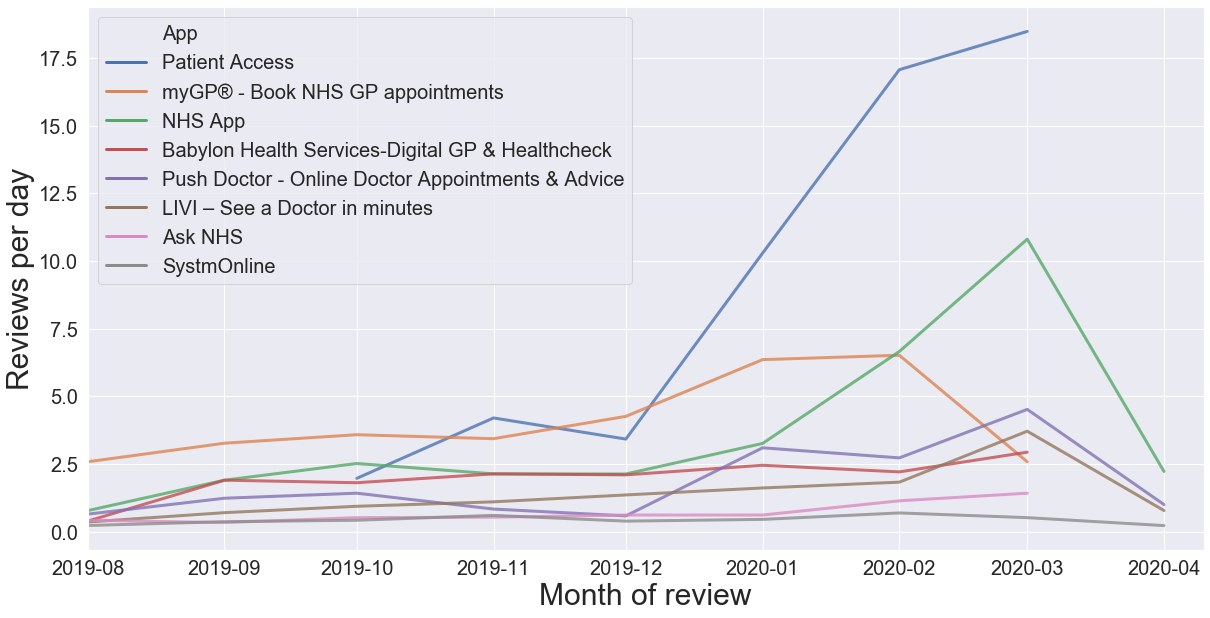

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='Month of review', y='Reviews per day', hue='App', data=df, ax=ax, alpha=0.8)
ax.set_xlim(pd.Timestamp(day=1, month=8, year=2019), pd.Timestamp(day=10, month=4, year=2020))

In [8]:
# try to understand if missing data from most recent?

In [9]:
# Length of feedback vs star rating
# Average length of feedback over time
# Star rating over time
# What terms are most predictive of past compared to present
# What terms are most predictive of +ve vs -ve feedback
# What terms are most predictive of +ve vs -ve in one month windows
# Counts of reviews over time by app
# Counts of reviews over time by star rating app
# Ratio of +ve to -ve vocab fraction over time (1 month bins)
# Ditto, by app
